In [190]:
# Import Modules
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
from pathlib import Path

In [191]:
# Set paths to csv files
call_volume = Path("./data/Call_Volume_20211102.csv")
prices = Path("./data/Stock_Prices_20211102.csv")
put_volume = Path("./data/Put_Volume_20211102.csv")
SPY_prices = Path("./data/SPY_Price_20211102.csv")

#sp500_path = Path("../Resources/sp500.csv")

In [192]:
# Read in csv files
call_volume_df = pd.read_csv(
    call_volume, 
    index_col="date", 
    infer_datetime_format=True, 
    parse_dates=True
)

price_df = pd.read_csv(
    prices, 
    index_col="date", 
    infer_datetime_format=True, 
    parse_dates=True
)

put_volume_df = pd.read_csv(
    put_volume, 
    index_col="date", 
    infer_datetime_format=True, 
    parse_dates=True
)

SPY_prices_df = pd.read_csv(
    SPY_prices, 
    index_col="date", 
    infer_datetime_format=True, 
    parse_dates=True
)

#call_volume_df
SPY_prices_df

,SPY
date,
2019-11-01,296.1603
2019-11-04,297.3502
2019-11-05,297.0213
2019-11-06,297.0890
2019-11-07,298.1338
...,...
2021-11-01,460.0400
2021-11-02,461.9000
2021-11-03,464.7200


In [193]:
start_date = "2020-04-01"
end_date = "2021-06-30"

call_volume_df = call_volume_df.loc[start_date:end_date]
put_volume_df = put_volume_df.loc[start_date:end_date]
SPY_prices_df = SPY_prices_df.loc[start_date:end_date]
price_df = price_df.loc[start_date:end_date]

display(SPY_prices_df.head())
#display(put_volume_df.head())

,SPY
date,
2020-04-01,240.7032
2020-04-02,246.2575
2020-04-03,242.6981
2020-04-06,258.9992
2020-04-07,259.2632


In [194]:
#Inputs
#nDay Return
shift = 3
# Call/Put Ratio Threshold
call_put_ratio_threshold = 2
adv_multiple = 4 #avg daily vol


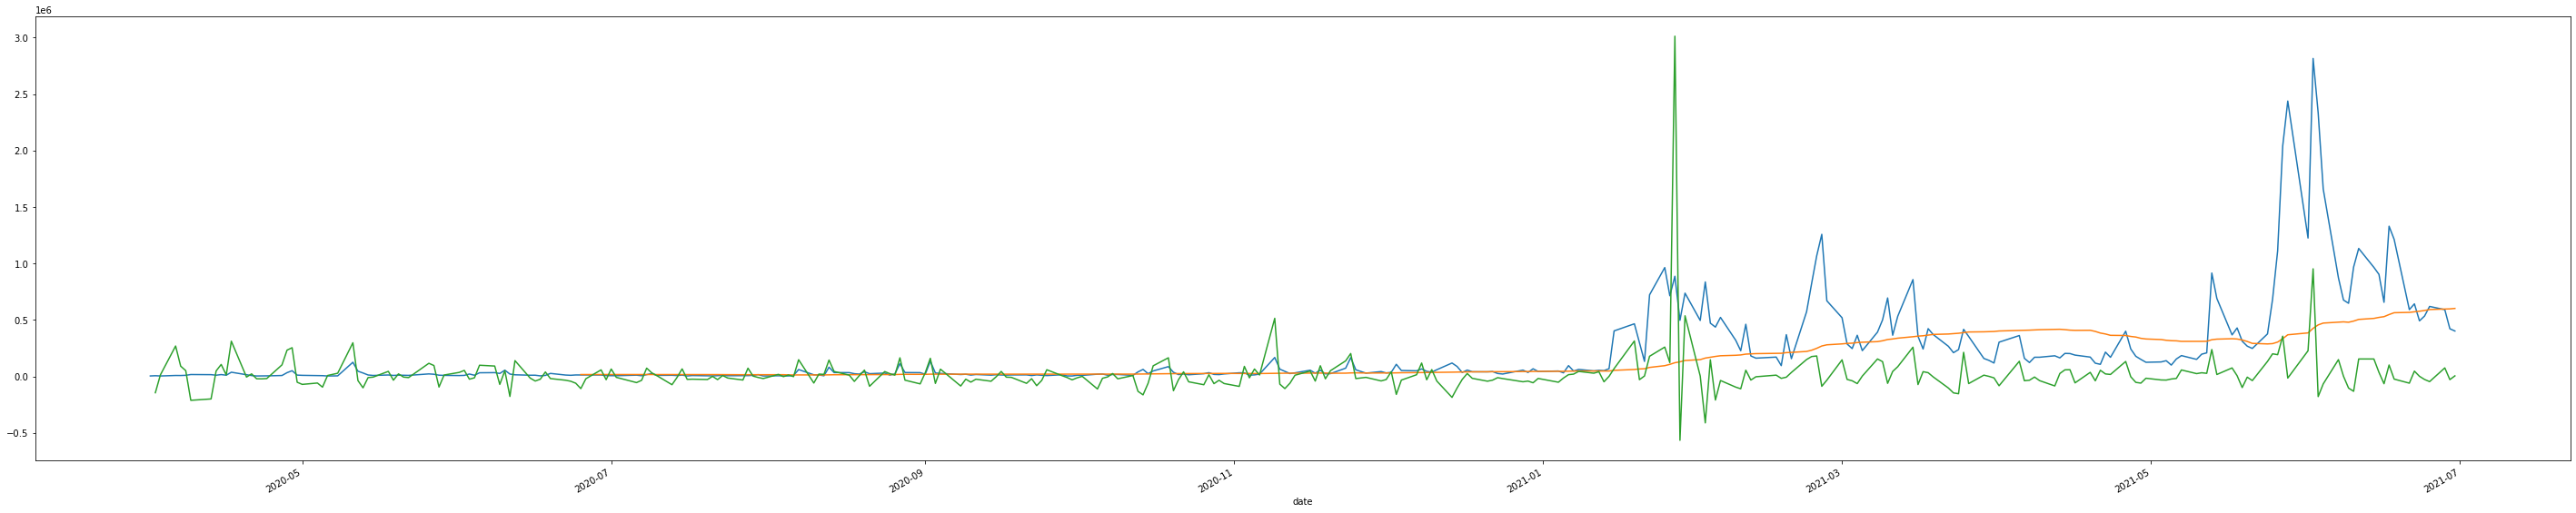

In [195]:
# Calculate the daily percent changes and drop n/a values
sixty_day_rolling_volume_df = call_volume_df.rolling(60).mean()
pct_change_one_day = price_df.pct_change()

#pct_change_five_day = (1+pct_change_one_day).rolling(window=5).apply(np.prod, raw=True) - 1


pct_change_one_day_scaled = pct_change_one_day * 1000000
#pct_change_five_day_scaled = pct_change_five_day * 100000000

#volume_df = volume_df.dropna()

#pct_change_five_day
volume_chart = call_volume_df['AMC'].plot(figsize=(50,10))
rolling_chart = sixty_day_rolling_volume_df['AMC'].plot(ax=volume_chart)
pct_chart = pct_change_one_day_scaled['AMC'].plot(ax=rolling_chart)
#pct_change_one_day_scaled['AMC'].plot(ax=pct_chart)



In [196]:
spy_pct_change = SPY_prices_df.pct_change()
spy_roll_var = spy_pct_change.rolling(60).var()
rolling_cov = pct_change_one_day.rolling(60).cov(spy_pct_change['SPY'])
rolling_beta = rolling_cov.copy()

for ticker in rolling_cov:
    rolling_beta[ticker] = rolling_cov[ticker]/spy_roll_var['SPY']

rolling_beta

,AAPL,TSLA,F,BABA,BAC,T,AMD,PLTR,AAL,NIO,...,RADA,DBI,GDOT,RL,SUMO,CNDT,IO,LL,DOLE,SYK
date,,,,,,,,,,,,,,,,,,,,,
2020-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-24,1.418808,1.710129,0.592923,0.107048,0.818609,0.381530,1.354127,1.159309,1.276011,0.806717,...,1.568291,1.672310,1.341088,1.173590,0.547995,1.902462,0.413647,1.941608,NaN,1.020480
2021-06-25,1.401573,1.656931,0.605948,0.151436,0.840801,0.397906,1.321602,1.116344,1.280866,0.767044,...,1.524559,1.674006,1.332129,1.157428,0.509385,1.910779,0.360980,1.940501,NaN,1.024315
2021-06-28,1.430449,1.747594,0.653758,0.191572,0.802608,0.386182,1.264091,1.197164,1.312326,0.770592,...,1.428725,1.790867,1.282931,1.269863,0.463195,1.843294,0.126125,1.858090,NaN,1.065668


In [197]:

shift_amt = shift * -1
shifted = price_df.shift(periods=shift_amt, axis="rows")
period_day_return = shifted/price_df-1

ticker_names = list(period_day_return)

trailing_sixty_day = sixty_day_rolling_volume_df.shift(periods=-1, axis="rows")
volume_indicator = adv_multiple * trailing_sixty_day

good_vol_signal = {}
no_vol_signal = {}

for ticker in ticker_names:
    i = 0
    good_vol_signal[ticker] = []
    no_vol_signal[ticker] = []

    for value in call_volume_df[ticker]:
        date = call_volume_df.index[i]
        if(value > volume_indicator[ticker][i]):
            good_vol_signal[ticker].append(date)
        else:
            no_vol_signal[ticker].append(date)
        i+= 1



In [198]:
good_vol_signal["AMC"]

[Timestamp('2020-08-07 00:00:00'),
 Timestamp('2020-08-13 00:00:00'),
 Timestamp('2020-08-27 00:00:00'),
 Timestamp('2020-09-02 00:00:00'),
 Timestamp('2020-11-09 00:00:00'),
 Timestamp('2020-11-24 00:00:00'),
 Timestamp('2021-01-15 00:00:00'),
 Timestamp('2021-01-19 00:00:00'),
 Timestamp('2021-01-20 00:00:00'),
 Timestamp('2021-01-22 00:00:00'),
 Timestamp('2021-01-25 00:00:00'),
 Timestamp('2021-01-26 00:00:00'),
 Timestamp('2021-01-27 00:00:00'),
 Timestamp('2021-01-29 00:00:00'),
 Timestamp('2021-02-02 00:00:00'),
 Timestamp('2021-02-25 00:00:00'),
 Timestamp('2021-05-27 00:00:00'),
 Timestamp('2021-05-28 00:00:00'),
 Timestamp('2021-06-02 00:00:00'),
 Timestamp('2021-06-03 00:00:00')]

In [199]:
#call_volume_df.iloc[2]['AAPL']
#call_volume_df[call_volume_df[ticker]== call_volume_df.iloc[2]['AAPL']].index.values
# notes for pulling index value
# call_volume_df.index[0]



In [200]:
call_put_ratio = call_volume_df / put_volume_df


In [201]:

good_ratio_signal = {}
no_ratio_signal = {}

for ticker in ticker_names:
    i = 0
    good_ratio_signal[ticker] = []
    no_ratio_signal[ticker] = []

    for ratio in call_put_ratio[ticker]:
        date = call_put_ratio.index[i]
        if(ratio > call_put_ratio_threshold):
            good_ratio_signal[ticker].append(date)
        else:
            no_ratio_signal[ticker].append(date)
        i+= 1

In [202]:
good_ratio_signal["AMC"]

[Timestamp('2020-05-27 00:00:00'),
 Timestamp('2020-06-02 00:00:00'),
 Timestamp('2020-06-05 00:00:00'),
 Timestamp('2020-07-08 00:00:00'),
 Timestamp('2020-07-09 00:00:00'),
 Timestamp('2020-07-23 00:00:00'),
 Timestamp('2020-08-07 00:00:00'),
 Timestamp('2020-08-11 00:00:00'),
 Timestamp('2020-08-13 00:00:00'),
 Timestamp('2020-08-14 00:00:00'),
 Timestamp('2020-08-17 00:00:00'),
 Timestamp('2020-08-18 00:00:00'),
 Timestamp('2020-08-19 00:00:00'),
 Timestamp('2020-08-20 00:00:00'),
 Timestamp('2020-08-21 00:00:00'),
 Timestamp('2020-08-24 00:00:00'),
 Timestamp('2020-08-25 00:00:00'),
 Timestamp('2020-08-26 00:00:00'),
 Timestamp('2020-08-27 00:00:00'),
 Timestamp('2020-08-28 00:00:00'),
 Timestamp('2020-08-31 00:00:00'),
 Timestamp('2020-09-01 00:00:00'),
 Timestamp('2020-09-02 00:00:00'),
 Timestamp('2020-09-03 00:00:00'),
 Timestamp('2020-09-04 00:00:00'),
 Timestamp('2020-09-09 00:00:00'),
 Timestamp('2020-09-14 00:00:00'),
 Timestamp('2020-09-16 00:00:00'),
 Timestamp('2020-09-

In [203]:
#Create final signal date lists within dictionaries
good_final_signal = {}
no_final_signal = {}

def intersection (lst1, lst2):
    return list (set(lst1) & set(lst2))

print(intersection(good_vol_signal["AMC"], good_ratio_signal["AMC"]))

for ticker in ticker_names:
    good_final_signal[ticker] = intersection(good_vol_signal[ticker], good_ratio_signal[ticker])

[Timestamp('2020-11-24 00:00:00'), Timestamp('2021-01-26 00:00:00'), Timestamp('2021-02-25 00:00:00'), Timestamp('2020-08-07 00:00:00'), Timestamp('2021-01-25 00:00:00'), Timestamp('2020-09-02 00:00:00'), Timestamp('2021-01-22 00:00:00'), Timestamp('2021-01-19 00:00:00'), Timestamp('2021-01-20 00:00:00'), Timestamp('2020-08-13 00:00:00'), Timestamp('2021-01-15 00:00:00'), Timestamp('2020-08-27 00:00:00')]


In [204]:
good_final_signal["AMC"]

[Timestamp('2020-11-24 00:00:00'),
 Timestamp('2021-01-26 00:00:00'),
 Timestamp('2021-02-25 00:00:00'),
 Timestamp('2020-08-07 00:00:00'),
 Timestamp('2021-01-25 00:00:00'),
 Timestamp('2020-09-02 00:00:00'),
 Timestamp('2021-01-22 00:00:00'),
 Timestamp('2021-01-19 00:00:00'),
 Timestamp('2021-01-20 00:00:00'),
 Timestamp('2020-08-13 00:00:00'),
 Timestamp('2021-01-15 00:00:00'),
 Timestamp('2020-08-27 00:00:00')]

In [205]:
def union (lst1, lst2):
    return list (set(lst1) | set(lst2))

for ticker in ticker_names:
    no_final_signal[ticker] = union(no_vol_signal[ticker], no_ratio_signal[ticker])


In [206]:
good_signal_returns = {}
no_signal_returns = {}

for ticker in ticker_names:
    good_signal_returns[ticker] = []
    no_signal_returns[ticker] = []
    for date in good_final_signal[ticker]:
        change = period_day_return.loc[date][ticker]
        good_signal_returns[ticker].append(change)
    for date in no_final_signal[ticker]:
        change = period_day_return.loc[date][ticker]
        no_signal_returns[ticker].append(change)
      
    

In [207]:
total=0
for ticker in ticker_names:
    total = total + len(good_signal_returns[ticker])
print(total)

6537


In [208]:
totalno=0
for ticker in ticker_names:
    totalno = totalno + len(no_signal_returns[ticker])
print(totalno) 

369888


In [209]:
good_signal_returns_list = []
filtered_ticker_names = ticker_names #['BBBY']

for ticker in filtered_ticker_names:
    good_signal_returns_list = good_signal_returns_list  + good_signal_returns[ticker]

no_signal_returns_gross_list = []
for ticker in filtered_ticker_names:
    no_signal_returns_gross_list = no_signal_returns_gross_list  + no_signal_returns[ticker]
no_signal_returns_list = [x for x in no_signal_returns_gross_list if np.isnan(x) == False]
len(no_signal_returns_list)

336744

In [227]:
#import matplotlib.pyplot as plt

#plt.hist(good_signal_returns['AMC'], density=True, bins=300)  # density=False would make counts
#plt.axis([-.5, 5, 0, 10]) 
#good_signal_returns_list.plot.hist()

import hvplot.pandas

good_signal_returns_list_df = pd.DataFrame(good_signal_returns_list)


good_signal_returns_list_df.hvplot.hist(bins=800, xlim=(-1,2))




:Histogram   [0]   (0_count)

In [224]:
pd.DataFrame(no_signal_returns_list).hvplot.hist(bins=500, xlim=(-.5,.5))


:Histogram   [0]   (0_count)

In [212]:
print(np.var(good_signal_returns_list))

nan


In [213]:
print(np.var(no_signal_returns_list))

0.009901461834574464


In [214]:
ttest_ind(a=good_signal_returns_list, b=no_signal_returns_list, equal_var=True)

Ttest_indResult(statistic=nan, pvalue=nan)

In [215]:
np.mean(good_signal_returns_list)

nan

In [216]:
np.mean(no_signal_returns_list)

0.01223038237916756

In [217]:
good_ratio_signal["TSLA"]

[Timestamp('2020-06-08 00:00:00'),
 Timestamp('2020-07-20 00:00:00'),
 Timestamp('2020-08-12 00:00:00'),
 Timestamp('2020-08-13 00:00:00'),
 Timestamp('2020-08-17 00:00:00'),
 Timestamp('2020-08-27 00:00:00'),
 Timestamp('2020-09-14 00:00:00'),
 Timestamp('2020-09-15 00:00:00'),
 Timestamp('2020-09-16 00:00:00'),
 Timestamp('2020-09-21 00:00:00'),
 Timestamp('2020-09-22 00:00:00'),
 Timestamp('2020-10-01 00:00:00'),
 Timestamp('2020-10-12 00:00:00'),
 Timestamp('2020-10-13 00:00:00'),
 Timestamp('2020-10-14 00:00:00'),
 Timestamp('2020-10-15 00:00:00'),
 Timestamp('2020-10-19 00:00:00'),
 Timestamp('2020-11-09 00:00:00'),
 Timestamp('2020-11-18 00:00:00'),
 Timestamp('2020-11-19 00:00:00'),
 Timestamp('2020-11-24 00:00:00'),
 Timestamp('2020-11-25 00:00:00'),
 Timestamp('2020-11-27 00:00:00'),
 Timestamp('2020-12-01 00:00:00'),
 Timestamp('2020-12-03 00:00:00'),
 Timestamp('2020-12-08 00:00:00'),
 Timestamp('2020-12-14 00:00:00'),
 Timestamp('2020-12-30 00:00:00'),
 Timestamp('2021-03-

In [218]:
market_cap = Path("./data/Market_Cap_20211102.csv")

market_cap_df = pd.read_csv(
    market_cap, 
    index_col="date", 
    infer_datetime_format=True, 
    parse_dates=True
)

market_cap_df.head()


,AAPL,TSLA,F,BABA,BAC,T,AMD,PLTR,AAL,NIO,...,RADA,DBI,GDOT,RL,SUMO,CNDT,IO,LL,DOLE,SYK
date,,,,,,,,,,,,,,,,,,,,,
2019-11-01,1.136676e+06,56472.5165,35247.9343,459426.1374,286044.4154,284451.85,38854.4645,NaN,13387.0516,1600.0467,...,191.4771,1224.7849,1506.9203,7566.9378,NaN,1346.1723,134.0636,261.4670,NaN,79654.0189
2019-11-04,1.144141e+06,57222.3351,35684.0730,467835.6717,291441.4798,284013.67,40413.5430,NaN,13557.8942,1800.0525,...,211.2720,1266.1922,1521.4299,7648.0204,NaN,1382.0984,134.6316,268.0682,NaN,76808.8314
2019-11-05,1.142497e+06,57177.2739,35763.3709,473849.9207,295219.4249,286136.85,40257.6351,NaN,13658.6475,2463.2297,...,210.8913,1339.5630,1519.3571,7881.2295,NaN,1409.5713,134.2056,269.2163,NaN,74263.1374
2019-11-06,1.142985e+06,58864.3657,35366.8812,479473.6341,294949.5717,286721.25,40012.6371,NaN,13562.2748,2136.9044,...,204.0392,1359.9035,1524.0208,7790.1080,NaN,1399.0048,129.0930,262.4078,NaN,75251.4656
2019-11-07,1.152716e+06,60479.3597,35247.9343,485982.5616,298907.4189,287963.10,40402.4067,NaN,13531.6107,2179.0109,...,195.6645,1351.9126,1552.0035,8630.8804,NaN,1560.1106,133.0695,267.8627,NaN,75165.3613
